In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import AgglomerativeClustering,SpectralClustering,Birch,KMeans,AffinityPropagation,DBSCAN,FeatureAgglomeration,BisectingKMeans
from sklearn.cluster import MiniBatchKMeans,SpectralCoclustering,SpectralBiclustering,OPTICS,MeanShift
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import kneighbors_graph
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.manifold import MDS#B SCORE 0.06 with 1D
from sklearn.manifold import Isomap#NOT LOGIC
from sklearn.manifold import LocallyLinearEmbedding#B SCORE 0.29 with 1D
from sklearn.manifold import TSNE#B SCORE 0.50 with 1D

In [12]:
data = pd.read_csv("/kaggle/input/irbid300/data.csv")
id = data["ID"]
pred = data.drop("ID",axis=1)

In [16]:
pred = data.drop("ID",axis=1)

random = 42

pca = PCA(n_components=0.92,random_state=random)
pred = pca.fit_transform(pred)

agglo = FeatureAgglomeration(n_clusters=60)
pred = agglo.fit_transform(pred)

reducer = UMAP(n_neighbors=14, min_dist=0.1, n_components=21, random_state=random)
pred = reducer.fit_transform(pred)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=random)
pred = tsne.fit_transform(pred)

b = Birch(n_clusters=11)

new = pd.concat([id,pd.DataFrame(b.fit_predict(pred),columns=["Predicted"])],axis=1)

df = pd.DataFrame(new)

df.to_csv('late.csv', index=False)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/tmp/ipykernel_33/2375978430.py:3: RuntimeWarning: Mean of empty slice.
  centroids.append(pred[predicted["Predicted"] == i].mean(axis=0))
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


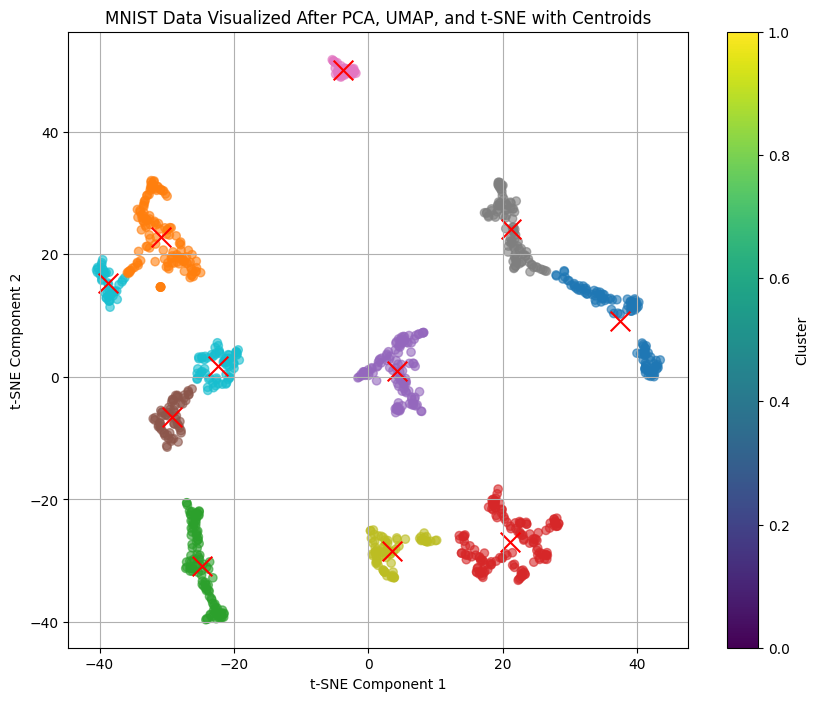

In [14]:
centroids = []
for i in range(100):
    centroids.append(pred[predicted["Predicted"] == i].mean(axis=0))

plt.figure(figsize=(10, 8))
plt.scatter(pred[:, 0], pred[:, 1], c=predicted["Predicted"], cmap='tab10', alpha=0.6)
plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], marker='x', c='red', s=200)
plt.colorbar(label='Cluster')
plt.title('MNIST Data Visualized After PCA, UMAP, and t-SNE with Centroids')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.savefig('k=9.png')
plt.show()

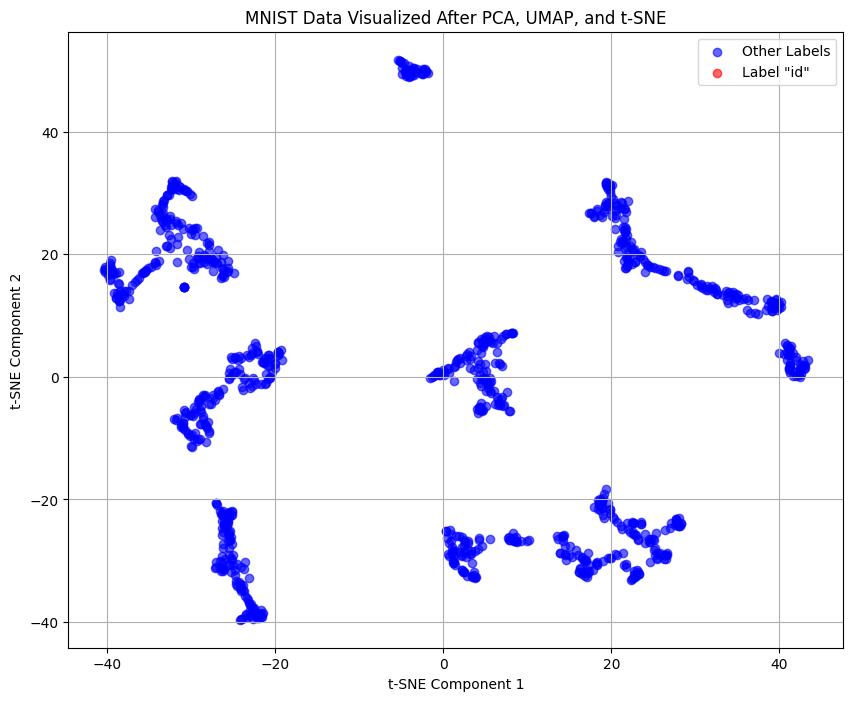

In [15]:
labels = id
mask = (labels == 'id')

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pred[:, 0], pred[:, 1], c='blue', alpha=0.6)  
plt.scatter(pred[mask, 0], pred[mask, 1], c='red', alpha=0.6)  
plt.title('MNIST Data Visualized After PCA, UMAP, and t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(['Other Labels', 'Label "id"'])
plt.grid(True)
plt.show()